spunto da [https://github.com/jupyterlab/jupyterlab/issues/3748](https://github.com/jupyterlab/jupyterlab/issues/3748)

In [1]:
%matplotlib inline

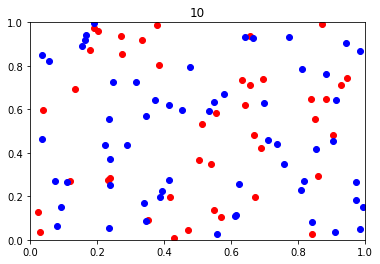

end cycle 1 of the simulation


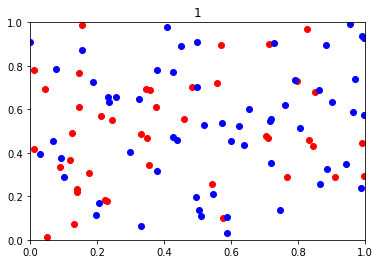

end cycle 1 of the animation
end cycle 2 of the simulation
end cycle 2 of the animation
end cycle 3 of the simulation
end cycle 3 of the animation
end cycle 4 of the simulation
end cycle 4 of the animation
end cycle 5 of the simulation
end cycle 5 of the animation
end cycle 6 of the simulation
end cycle 6 of the animation
end cycle 7 of the simulation
end cycle 7 of the animation
end cycle 8 of the simulation
end cycle 8 of the animation
end cycle 9 of the simulation
end cycle 9 of the animation
end cycle 10 of the simulation
end cycle 10 of the animation


In [7]:
import matplotlib.pyplot as plt
import numpy.random as npr

# Create a named display, if in iPython
myDisplay = display(None, display_id=True)

agList=[]
nAg=100
nCycles=10
dots=ax=fig=0 #to avoid an error of referencing without assignement


class AgBase():
    def __init__(self):
        self.breed=npr.randint(0,2)
        self.x=npr.random_sample()
        self.y=npr.random_sample()
    
    def move(self):
        self.x=npr.random_sample()
        self.y=npr.random_sample()
        
    def reportPos(self):
        return self.x, self.y
    
    def reportBreed(self):
        return self.breed

def update():
    global ax
    xList0=[]
    yList0=[]
    xList1=[]
    yList1=[]
    
    for i in range(len(agList)):
        x,y=agList[i].reportPos()
        if agList[i].reportBreed() == 0:
            xList0.append(x)
            yList0.append(y)
        if agList[i].reportBreed() == 1:
            xList1.append(x)
            yList1.append(y)

    dots[0].set_data(xList0, yList0)
    dots[1].set_data(xList1, yList1)

    #ax.plot(xList0,yList0,'ro',xList1,yList1,'bo')
            
    
# simulation
def simulation(t):
    global agList, nAG
    if t==1:
        # create agents
        for i in range(nAg):
            a=AgBase()
            agList.append(a)
        
    for i in range(len(agList)):
            agList[i].move()
    print("end cycle",t,"of the simulation")


def animation(t):
    global ax,fig,dots
    if t==1:
        # prepare graphic space
        fig, ax = plt.subplots()
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)
        dots = ax.plot([],[],'ro',[],[],'bo')
    
    """
    # if not in iPython
    plt.gca().cla()
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    """

    update()
    ax.set_title(str(t))
    #fig.canvas.draw()
    myDisplay.update(fig)
    plt.pause(0.5)
    print("end cycle",t,"of the animation")

for t in range(1,nCycles+1):
    simulation(t)
    animation(t)